In [105]:
from scipy.integrate import solve_ivp
import numpy as np

In [106]:
import Utils.Graphics_Utils as mu

ModuleNotFoundError: No module named 'Utils'

## Система ДУ

In [3]:
def coupleBickSystem_Simplifyed(K, Eps, a2, a4, r):
    def rhs(t, X):
        x1, x2, x3, y1, y2, y3 = X
        dX = [Eps - 2*np.cos(a2)*np.sin(x1) - Eps*np.cos(x1)*np.cos(y1) - Eps*np.sin(x1)*np.sin(y1) - K*np.cos(a4)*np.cos(x2)*np.sin(x1) + K*np.cos(a4)*np.cos(x3)*np.sin(x1) + 4*r*np.cos(x1)*np.sin(x1)*(2*np.cos(a2)**2 - 1),
    Eps - 2*np.cos(a2)*np.sin(x2) - Eps*np.cos(x2)*np.cos(y2) - Eps*np.sin(x2)*np.sin(y2) + K*np.cos(a4)*np.cos(x1)*np.sin(x2) - K*np.cos(a4)*np.cos(x3)*np.sin(x2) + 4*r*np.cos(x2)*np.sin(x2)*(2*np.cos(a2)**2 - 1),
    Eps - 2*np.cos(a2)*np.sin(x3) - Eps*np.cos(x3)*np.cos(y3) - Eps*np.sin(x3)*np.sin(y3) - K*np.cos(a4)*np.cos(x1)*np.sin(x3) + K*np.cos(a4)*np.cos(x2)*np.sin(x3) + 4*r*np.cos(x3)*np.sin(x3)*(2*np.cos(a2)**2 - 1),
    Eps - 2*np.cos(a2)*np.sin(y1) - Eps*np.cos(x1)*np.cos(y1) - Eps*np.sin(x1)*np.sin(y1) + K*np.cos(a4)*np.cos(y2)*np.sin(y1) - K*np.cos(a4)*np.cos(y3)*np.sin(y1) + 4*r*np.cos(y1)*np.sin(y1)*(2*np.cos(a2)**2 - 1),
    Eps - 2*np.cos(a2)*np.sin(y2) - Eps*np.cos(x2)*np.cos(y2) - Eps*np.sin(x2)*np.sin(y2) - K*np.cos(a4)*np.cos(y1)*np.sin(y2) + K*np.cos(a4)*np.cos(y3)*np.sin(y2) + 4*r*np.cos(y2)*np.sin(y2)*(2*np.cos(a2)**2 - 1),
    Eps - 2*np.cos(a2)*np.sin(y3) - Eps*np.cos(x3)*np.cos(y3) - Eps*np.sin(x3)*np.sin(y3) + K*np.cos(a4)*np.cos(y1)*np.sin(y3) - K*np.cos(a4)*np.cos(y2)*np.sin(y3) + 4*r*np.cos(y3)*np.sin(y3)*(2*np.cos(a2)**2 - 1)]
        return dX
    return rhs

def evt(val):
    def Evt(t, x):
        return np.sin(x[0] - np.pi/4)
    return Evt

In [4]:
rhs = coupleBickSystem_Simplifyed(0.4, 1e-5, np.pi/2, np.pi, 0.1)

In [5]:
sol = solve_ivp(rhs, [0.0, 1000.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], events=evt(0.75))

## Time series

test.pdf
test.pdf
test.pdf
test.pdf
test.pdf


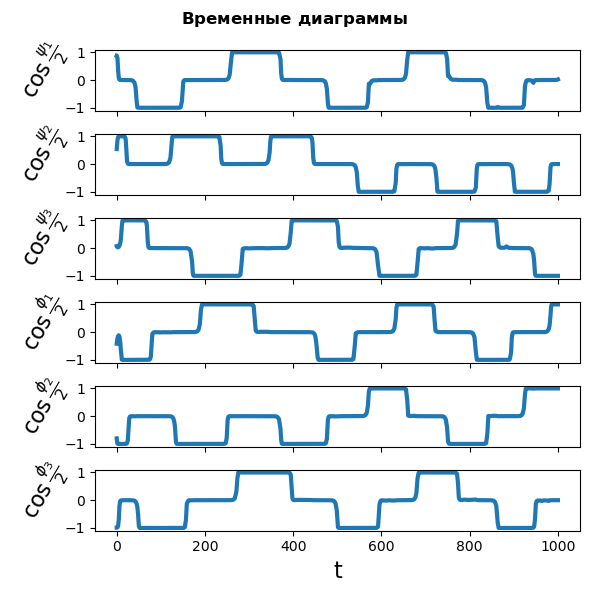

In [6]:
mu.plotTimeSeries(sol, projFunc = mu.projHalfCos,
                    varNames = [r'\psi_1', r'\psi_2', r'\psi_3', r'\phi_1', r'\phi_2', r'\phi_3'],
                    plotKwargs = {"linewidth" : 3}, title = None,  savePath = "test.pdf")

## Poincare

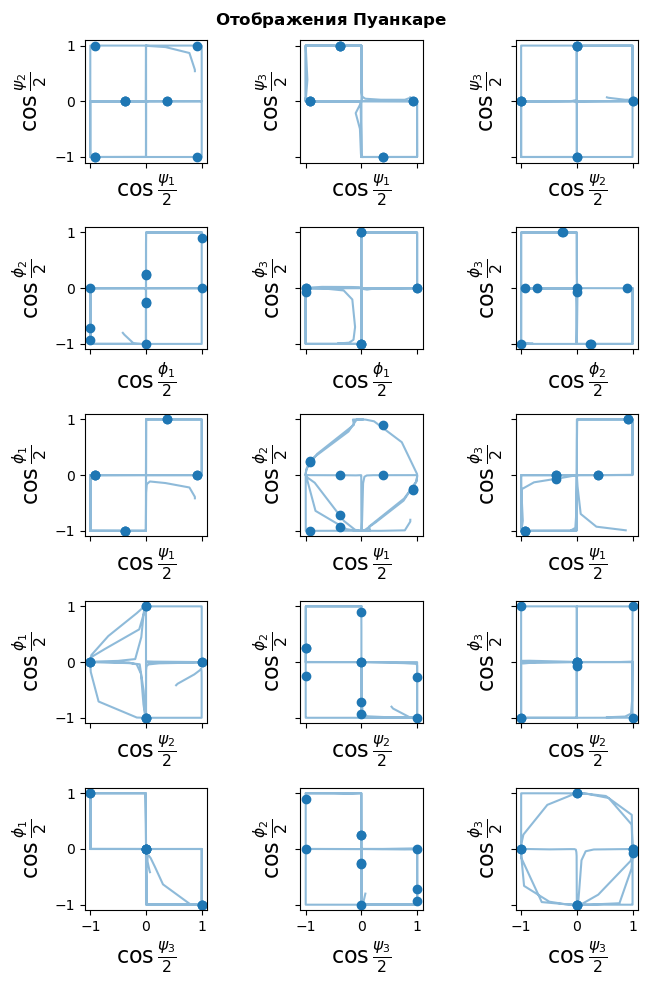

In [7]:
mu.plotPoincare(sol, [[[0, 1], [0, 2], [1, 2]],
                            [[3, 4], [3, 5], [4, 5]],
                            [[0, 3], [0, 4], [0, 5]],
                            [[1, 3], [1, 4], [1, 5]],
                            [[2, 3], [2, 4], [2, 5]]],
                        varNames = [r'\psi_1', r'\psi_2', r'\psi_3',  r'\phi_1', r'\phi_2', r'\phi_3'],
                        showEvents = True,
                        projFunc = mu.projHalfCos,
                        savePath = "Results\\pic.pdf")

## Returning time

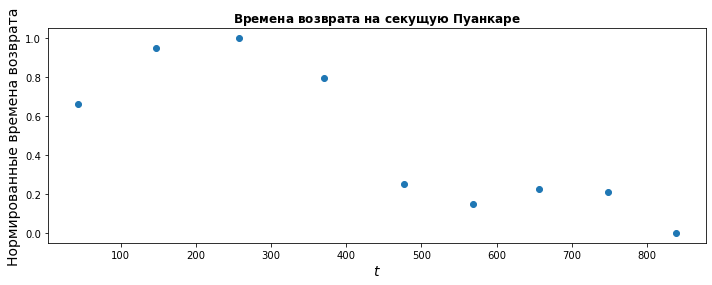

In [8]:
mu.plotReturnTime(sol)

## Activity diagram

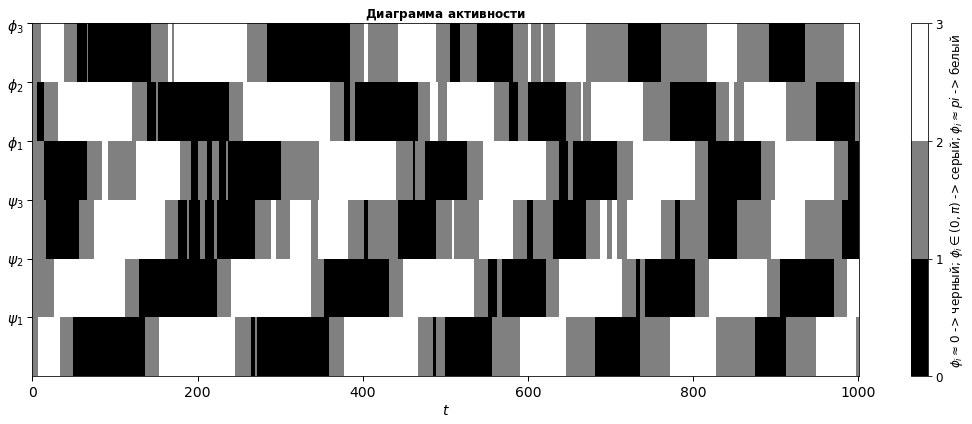

In [9]:
mu.plotActivationDiagram(sol, varNames = ["$\psi_1$","$\psi_2$","$\psi_3$","$\phi_1$","$\phi_2$","$\phi_3$"])

In [ ]:
mu.plotActivationDiagram_continuos(sol, varNames = ["$\psi_1$","$\psi_2$","$\psi_3$","$\phi_1$","$\phi_2$","$\phi_3$"])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

In [22]:
def projNone(X):
    return X
projNone.label = lambda varName: r'${}$'.format(varName)

In [2]:
def circleDist(x, y):
    xStd = x % (2 * np.pi)
    yStd = y % (2 * np.pi)
    return min(np.abs(xStd - yStd), 2 * np.pi - np.abs(xStd - yStd))


def normValue(x):
    eps = 1e-2
    label = 1.5
    if circleDist(x, 0.) < eps:
        label = 0.5  # white
    elif circleDist(x, np.pi) < eps:
        label = 2.5  # black

    return label


class ColorActivation:
    def __init__(self, colorList, normalizeFunc):
        assert len(colorList) == 3, 'Must be three colors!'
        self.colorList = colorList
        # create colormap to use further
        myCmap = mpc.ListedColormap(colorList)
        boundaries = [0, 1, 2, 3]
        myNorm = mpc.BoundaryNorm(boundaries, myCmap.N, clip=True)
        # assign to fields
        self.cmap = myCmap
        self.norm = myNorm
        self.normFunc = normalizeFunc


def plotActivationDiagram(sol, varNames = None, colorizer = None, title = None, savePath = None):
    if varNames == None : varNames = [f"y_{{{p}}}" for p in range(1, len(sol.y) + 1)]
    if colorizer == None : colorizer = ColorActivation([(0, 0, 0), (0.5, 0.5, 0.5), (1, 1, 1)], normValue)
    if title == None : title = r"$\bf{Диаграмма~активности}$"

    solMat = np.array(sol.y)
    clrdPlt = [[colorizer.normFunc(v) for v in row] for row in solMat]
    plt.close()
    fig = plt.figure(figsize=(15, 6))
    N = len(varNames)
    pcm = plt.pcolormesh(sol.t, range(N), clrdPlt, cmap=colorizer.cmap, norm=colorizer.norm, shading='nearest')
    cbar = fig.colorbar(pcm)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label = r"$\phi_i \approx 0$ -> черный; $\phi_i \in (0, \pi)$ -> серый; $\phi_i \approx pi$ -> белый", size=12) 
    plt.gca().set_yticks(0.5 + np.arange(N))
    plt.gca().set_yticklabels([projNone.label(var) for var in varNames], fontsize=14)

    plt.gca().tick_params(which="major", width=1.0, labelsize=14)
    plt.gca().tick_params(which="major", length=5, labelsize=14)
    plt.xlabel(r'$t$', fontsize=14)

    plt.title(title)
    plt.tight_layout()
    if savePath != None : fig.savefig(savePath)

    return fig

In [19]:
class solution:
    def __init__(self):
        self.y = []
        self.t = []

In [25]:
import random as rnd

In [51]:
import numpy as np

In [88]:
sol = solution()

l = 1000
sol.y = [np.linspace(i/5*np.pi, 4*np.pi + i/5*np.pi, l) for i in range(6)]
sol.t = range(l)

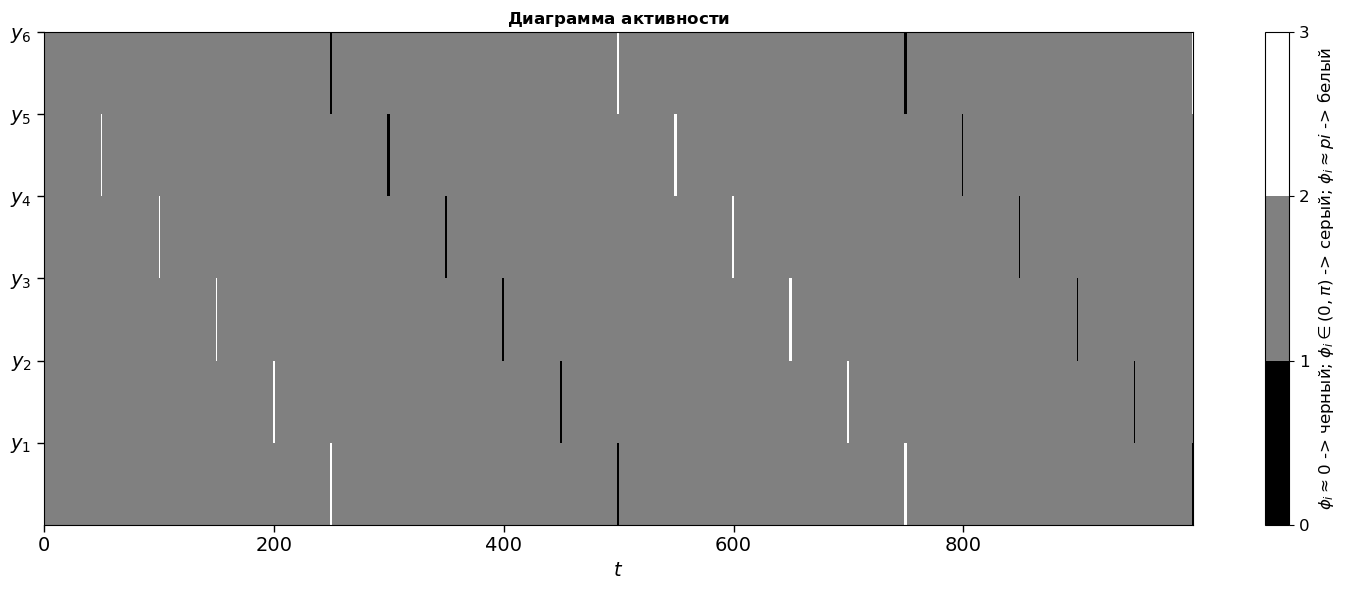

In [89]:
plotActivationDiagram(sol);

In [85]:
from matplotlib.colors import BoundaryNorm

In [95]:
clrdPlt = [[circleDist(y, 0.0) for y in s]for s in sol.y]

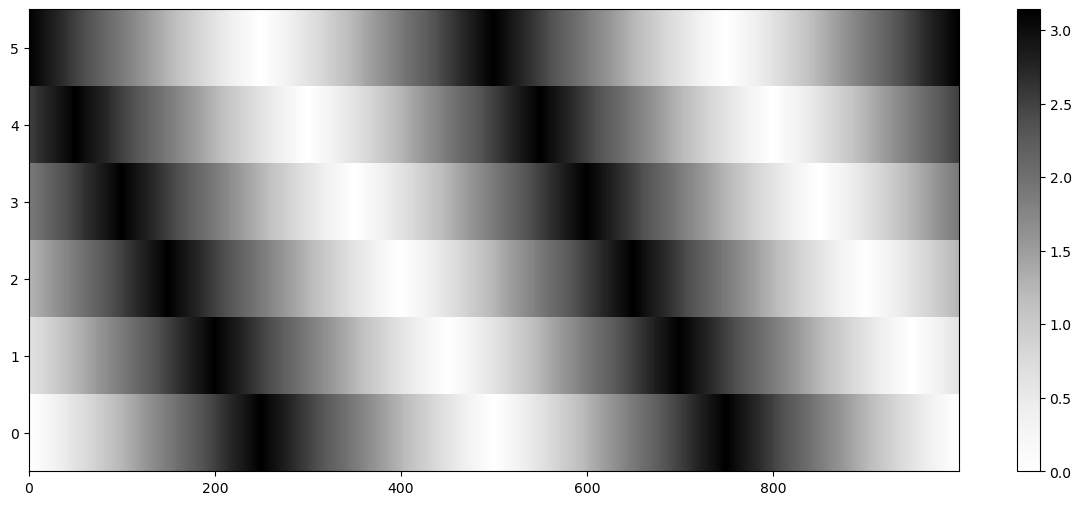

In [98]:
fig = plt.figure(figsize=(15, 6))
N = 6
cmap = plt.colormaps['Greys']

pcm = plt.pcolormesh(sol.t, range(N), clrdPlt, cmap=cmap, vmin=0.0, vmax=np.pi)
cbar = fig.colorbar(pcm)

In [102]:
def plotActivationDiagram_continuos(sol, varNames = None, cmap = None, title = None, savePath = None):
    if varNames == None : varNames = [f"y_{{{p}}}" for p in range(1, len(sol.y) + 1)]
    if cmap == None : cmap = plt.colormaps['Greys']
    if title == None : title = r"$\bf{Диаграмма~активности}$"

    solMat = np.array(sol.y)
    clrdPlt = [[circleDist(y, 0.0) for y in s]for s in solMat]
    plt.close()
    fig = plt.figure(figsize=(15, 6))
    N = len(varNames)
    pcm = plt.pcolormesh(sol.t, range(N), clrdPlt, cmap=cmap, shading='nearest')
    cbar = fig.colorbar(pcm)
    cbar.ax.tick_params(labelsize=12)
    plt.gca().set_yticks(0.5 + np.arange(N))
    plt.gca().set_yticklabels([projNone.label(var) for var in varNames], fontsize=14)

    plt.gca().tick_params(which="major", width=1.0, labelsize=14)
    plt.gca().tick_params(which="major", length=5, labelsize=14)
    plt.xlabel(r'$t$', fontsize=14)

    plt.title(title)
    plt.tight_layout()
    if savePath != None : fig.savefig(savePath)

    return fig

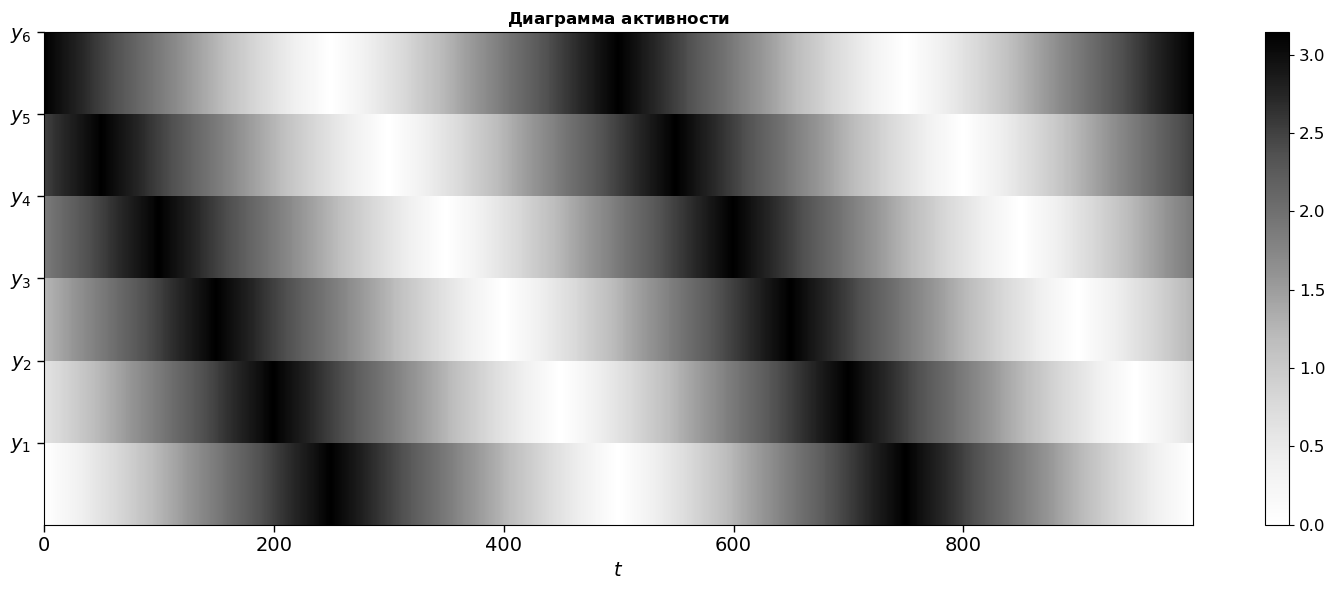

In [104]:
plotActivationDiagram_continuos(sol);